<a href="https://colab.research.google.com/github/SaurabhSRP/POC-ANN/blob/main/POC_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [ ]:
##Import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/datasets/ANN/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
###Divide independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
##Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [ ]:
##Concatenate these variables with dataframe
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
##Splitting the dataset into Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
##Feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
###Lets Create the ANN
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout 


In [ ]:
##Lets initialise the ANN 
classifier=Sequential()

In [ ]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu')) #Dense unit =11 because we have 11 inputs

In [ ]:
##Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
##you want you can add droplayer too as shown below
classifier.add(Dropout(0.2))

In [ ]:
##adding the second Hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
##Output layer 
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) ##by default adam takes learning rate of 0.01

##Or if you dont need own learning rate you can define optimizer as adam 
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
##to add our learning rate for adam
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01) ##here you can add your own Learning rate with the optimizer variable which we will use in compile

In [ ]:
##Train neural network
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4127 - accuracy: 0.8233 - val_loss: 0.3722 - val_accuracy: 0.8448
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3612 - accuracy: 0.8509 - val_loss: 0.3569 - val_accuracy: 0.8512
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3515 - accuracy: 0.8561 - val_loss: 0.3521 - val_accuracy: 0.8546
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3457 - accuracy: 0.8567 - val_loss: 0.3425 - val_accuracy: 0.8557
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3433 - accuracy: 0.8604 - val_loss: 0.3503 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3425 - accuracy: 0.8569 - val_loss: 0.3463 - val_accuracy: 0.8629
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3383 - accuracy: 0.8602 - val_loss: 0.3397 - val_accuracy:

KeyboardInterrupt: ignored

We will do early stopping when accuracy is almost same , then we can stop after certain point of epochs

In [ ]:
##Early stopping #when accuracy is not incrasing we will do early stopping automatically 
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3034 - accuracy: 0.8753 - val_loss: 0.3882 - val_accuracy: 0.8595
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3071 - accuracy: 0.8740 - val_loss: 0.3774 - val_accuracy: 0.8603
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3040 - accuracy: 0.8752 - val_loss: 0.4046 - val_accuracy: 0.8637
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3049 - accuracy: 0.8763 - val_loss: 0.3966 - val_accuracy: 0.8573
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3044 - accuracy: 0.8778 - val_loss: 0.3976 - val_accuracy: 0.8546
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3024 - accuracy: 0.8744 - val_loss: 0.3879 - val_accuracy: 0.8576
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3050 - accuracy: 0.8774 - val_loss: 0.3864 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

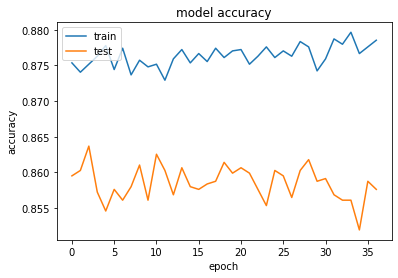

In [ ]:
##SUmmarize history for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

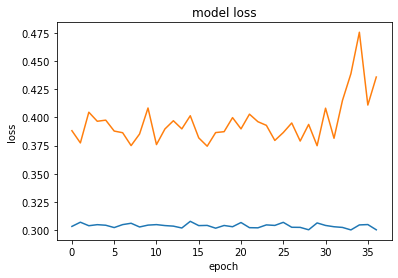

In [ ]:
##Summarize history for loss 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
##Part 3 - Making the prediction and evaluatting the model

##Prediction the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [ ]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1510,   68],
       [ 249,  173]])

In [ ]:
##calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8415

In [ ]:
##To get the weights or view the weights
classifier.get_weights()

[array([[ 0.1445631 , -0.4040028 ,  1.2694197 ,  0.3059273 ,  0.46065465,
         -0.44429305,  1.3062589 , -0.16450505,  0.9652514 ,  5.1013308 ,
          1.6942081 ],
        [ 4.9320607 ,  1.8834292 ,  0.7013435 ,  3.7708495 , -0.9585299 ,
         -7.965273  , -2.0974734 ,  0.3719384 ,  2.1541169 , -3.610264  ,
         -2.8180418 ],
        [ 0.02039265, -0.24562067, -0.40918455, -0.19010158,  0.2774791 ,
          0.91458565,  2.3792727 ,  0.38368607,  1.3166698 , -2.0823612 ,
         -3.2133126 ],
        [ 1.1954187 , -6.9141955 , -2.493947  , -0.69781554, -0.37064183,
         -1.8057576 , -3.4321916 , -5.3626456 , -0.01804001,  0.90653193,
         -5.2794847 ],
        [-1.8559455 , -3.7934806 ,  0.3984745 , -0.9327582 ,  5.8867755 ,
          1.928019  ,  0.71900666, -6.1988535 ,  4.0461254 ,  1.5915425 ,
          0.808552  ],
        [ 0.3316837 ,  0.37242994, -2.29953   , -0.01892312, -0.35758492,
         -2.1628668 ,  1.6264902 ,  0.2330937 , -0.5051336 ,  1.2872488